In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2 
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image

In [4]:
breast_img = glob.glob('D:/User/College/Deep Learning/CompleteBC Dataset/**/*.png', recursive = True)
print("Paths for first 2 images")
for imgname in breast_img[:2]:
    print(imgname)

Paths for first 2 images
D:/User/College/Deep Learning/CompleteBC Dataset\10253\0\10253_idx5_x1001_y1001_class0.png
D:/User/College/Deep Learning/CompleteBC Dataset\10253\0\10253_idx5_x1001_y1051_class0.png


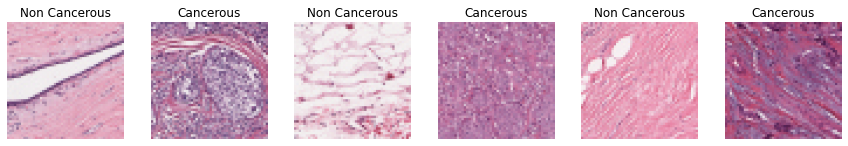

In [7]:
N_IDC = []
P_IDC = []

for img in breast_img:
    if img.endswith("class0.png") :
        N_IDC.append(img)
    
    elif img.endswith("class1.png") :
        P_IDC.append(img)
plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(N_IDC), 3)
some_can = np.random.randint(0, len(P_IDC), 3)

s = 0
for num in some_non:
    
        img = image.load_img((N_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('Non Cancerous')
        plt.imshow(img.astype('uint8'))
        s += 1
s = 1
for num in some_can:
    
        img = image.load_img((P_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('Cancerous')
        plt.imshow(img.astype('uint8'))
        s += 1

In [8]:
non_img_arr = []
can_img_arr = []

for img in N_IDC:
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
for img in P_IDC:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

print("Resized image in 50x50 px then adding in a list of which each element is a two-element(image,label)")    

Resized image in 50x50 px then adding in a list of which each element is a two-element(image,label)


In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr, can_img_arr))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

print("Concatenated both list in single list and shuffled then created two more lists one for numpy array of image data and other for label")

Concatenated both list in single list and shuffled then created two more lists one for numpy array of image data and other for label


In [11]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,y)

Total number of images: 555048
Number of IDC(-) Images: 530118
Number of IDC(+) Images: 24930
Image shape (Width, Height, Channels): (50, 50, 3)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (388533, 50, 50, 3)
Testing Data Shape: (166515, 50, 50, 3)


In [13]:
X_train = X_train[0:300000] 
Y_train = Y_train[0:300000] 
X_test = X_test[0:100000] 
Y_test = Y_test[0:100000]

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (300000, 50, 50, 3)
Testing Data Shape: (100000, 50, 50, 3)


In [14]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools

In [15]:
early_stop=EarlyStopping(monitor='val_loss',patience=5)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

In [16]:
model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 32)       128       
 hNormalization)                                                 
                                                        

In [18]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 20, batch_size = 25)

Epoch 1/20
12000/12000 [==============================] - 1827s 152ms/step - loss: 0.1407 - accuracy: 0.9551 - val_loss: 0.1320 - val_accuracy: 0.9569
Epoch 2/20
12000/12000 [==============================] - 1796s 150ms/step - loss: 0.1237 - accuracy: 0.9568 - val_loss: 0.1310 - val_accuracy: 0.9579
Epoch 3/20
12000/12000 [==============================] - 1778s 148ms/step - loss: 0.1191 - accuracy: 0.9580 - val_loss: 0.1351 - val_accuracy: 0.9531
Epoch 4/20
12000/12000 [==============================] - 1780s 148ms/step - loss: 0.1137 - accuracy: 0.9603 - val_loss: 0.1283 - val_accuracy: 0.9525
Epoch 5/20
12000/12000 [==============================] - 1799s 150ms/step - loss: 0.1100 - accuracy: 0.9611 - val_loss: 0.1530 - val_accuracy: 0.9603
Epoch 6/20
12000/12000 [==============================] - 1778s 148ms/step - loss: 0.1068 - accuracy: 0.9625 - val_loss: 0.1268 - val_accuracy: 0.9545
Epoch 7/20
12000/12000 [==============================] - 1930s 161ms/step - loss: 0.1038 - ac

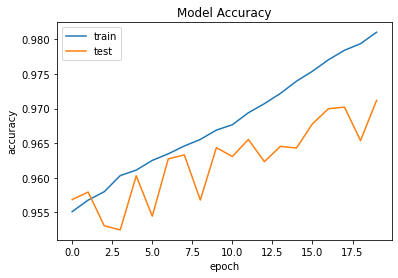

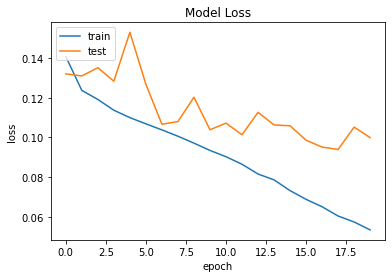

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

3125/3125 [==============================] - 105s 34ms/step


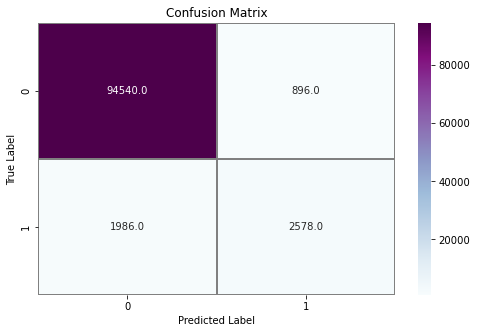

In [20]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 
#accuracy=accuracy_score(y_true=Y_true, y_pred=Y_pred)
#print(accuracy)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [22]:
model.evaluate(X_test,Y_test)

3125/3125 [==============================] - 110s 35ms/step - loss: 0.0999 - accuracy: 0.9712


[0.09990543127059937, 0.9711800217628479]

Image at index 501 :


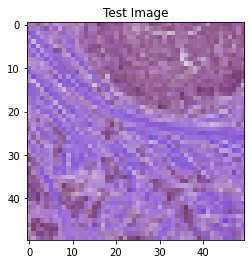

In [27]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
    
index = 501
img_plot(X_test, index)
print("Image at index 501 :")

In [24]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
index = 501
input = X_test[index:index+1]
pred = model.predict(input)[0].argmax()
label = Y_test[index].argmax()
print('Predicted Value using  cnn model',pred)
print("True Value",label)

1/1 [==============================] - 0s 159ms/step
Predicted Value using  cnn model 0
True Value 0


In [28]:
print("Above randomly checked for index 501 image if the model works ")

Above randomly checked for index 501 image if the model works 


In [26]:
#saving the model
model.save("D:/User/College/BreastCancerModel_Final")

INFO:tensorflow:Assets written to: D:/User/College/BreastCancerModel_Final\assets


INFO:tensorflow:Assets written to: D:/User/College/BreastCancerModel_Final\assets
